### A. Checking and Preprocessing

In [45]:
import pandas as pd

df= pd.read_csv('heart_dataset_train_all.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,41,Male,medium,105.0,198.0,0,1.0,168.0,0,0.0,2.0,1,2.0,1.0
1,65,Female,low,120.0,177.0,0,1.0,140.0,0,0.4,2.0,0,3.0,1.0
2,44,Female,medium,130.0,219.0,0,0.0,188.0,0,0.0,2.0,0,2.0,1.0
3,54,Female,high,125.0,273.0,0,0.0,152.0,0,0.5,0.0,1,2.0,1.0
4,51,Female,severe,125.0,213.0,0,0.0,125.0,1,1.4,2.0,1,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,40,Female,low,110.0,167.0,0,0.0,114.0,1,2.0,1.0,0,3.0,0.0
269,60,Female,low,117.0,230.0,1,1.0,160.0,1,1.4,2.0,2,3.0,0.0
270,64,Female,high,140.0,335.0,0,1.0,158.0,0,0.0,2.0,0,2.0,0.0
271,43,Female,low,120.0,177.0,0,0.0,120.0,1,2.5,1.0,0,3.0,0.0


In [46]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       273 non-null    int64  
 1   sex       272 non-null    object 
 2   cp        272 non-null    object 
 3   trestbps  272 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       273 non-null    int64  
 6   restecg   272 non-null    float64
 7   thalach   272 non-null    float64
 8   exang     273 non-null    int64  
 9   oldpeak   273 non-null    float64
 10  slope     271 non-null    float64
 11  ca        273 non-null    int64  
 12  thal      272 non-null    float64
 13  target    272 non-null    float64
dtypes: float64(8), int64(4), object(2)
memory usage: 30.0+ KB


In [48]:
# checking for null values
df.isnull().sum()

age         0
sex         1
cp          1
trestbps    1
chol        2
fbs         0
restecg     1
thalach     1
exang       0
oldpeak     0
slope       2
ca          0
thal        1
target      1
dtype: int64

In [49]:
df = df.dropna()

In [50]:
df.shape

(270, 14)

In [51]:
# Mapping 'sex' descriptions to numbers
sex_description = {
    'Male': 0,
    'Female': 1,
}
df.loc[:, 'sex'] = df['sex'].map(sex_description)

# Mapping 'cp' (chest pain) descriptions to numbers
pain_description = {
    'low': 0,
    'medium': 1,
    'high': 2,
    'severe': 3
}
df.loc[:, 'cp'] = df['cp'].map(pain_description)

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,41,0,1,105.0,198.0,0,1.0,168.0,0,0.0,2.0,1,2.0,1.0
1,65,1,0,120.0,177.0,0,1.0,140.0,0,0.4,2.0,0,3.0,1.0
2,44,1,1,130.0,219.0,0,0.0,188.0,0,0.0,2.0,0,2.0,1.0
3,54,1,2,125.0,273.0,0,0.0,152.0,0,0.5,0.0,1,2.0,1.0
4,51,1,3,125.0,213.0,0,0.0,125.0,1,1.4,2.0,1,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,40,1,0,110.0,167.0,0,0.0,114.0,1,2.0,1.0,0,3.0,0.0
269,60,1,0,117.0,230.0,1,1.0,160.0,1,1.4,2.0,2,3.0,0.0
270,64,1,2,140.0,335.0,0,1.0,158.0,0,0.0,2.0,0,2.0,0.0
271,43,1,0,120.0,177.0,0,0.0,120.0,1,2.5,1.0,0,3.0,0.0


In [52]:
df.describe() 

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.385185,131.525926,245.607407,0.151852,0.522222,149.807407,0.333333,1.024074,1.400000,0.744444,2.300000,0.544444
std,9.149713,17.904675,51.529411,0.359544,0.529314,23.217253,0.472280,1.188379,0.618188,1.037166,0.623874,0.498946
min,29.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.250000,120.000000,210.250000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,140.000000,274.000000,0.000000,1.000000,167.750000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [53]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.062222,-0.103697,0.261782,0.210520,0.109847,-0.124588,-0.412624,0.111263,0.200243,-0.165360,0.254462,0.077368,-0.244798
sex,-0.062222,1.000000,-0.040197,-0.055463,-0.166885,0.042384,-0.069599,-0.058626,0.124054,0.089726,-0.038771,0.140795,0.198493,-0.283776
cp,-0.103697,-0.040197,1.000000,0.035563,-0.063592,0.065869,0.008389,0.300307,-0.428233,-0.183616,0.135174,-0.180598,-0.139765,0.425574
trestbps,0.261782,-0.055463,0.035563,1.000000,0.128444,0.170606,-0.145195,-0.056631,0.067116,0.184896,-0.126553,0.093545,0.068690,-0.173239
chol,0.210520,-0.166885,-0.063592,0.128444,1.000000,0.003430,-0.162687,-0.023753,0.063902,0.084355,-0.031929,0.068647,0.121280,-0.096773
fbs,0.109847,0.042384,0.065869,0.170606,0.003430,1.000000,-0.086165,-0.014297,0.029190,0.007943,-0.056866,0.164266,-0.004972,-0.068845
restecg,-0.124588,-0.069599,0.008389,-0.145195,-0.162687,-0.086165,1.000000,0.025457,-0.089225,-0.047837,0.074982,-0.053946,-0.003377,0.101817
thalach,-0.412624,-0.058626,0.300307,-0.056631,-0.023753,-0.014297,0.025457,1.000000,-0.404349,-0.340564,0.370073,-0.205060,-0.078637,0.432687
exang,0.111263,0.124054,-0.428233,0.067116,0.063902,0.029190,-0.089225,-0.404349,1.000000,0.294308,-0.280124,0.106250,0.189253,-0.457502
oldpeak,0.200243,0.089726,-0.183616,0.184896,0.084355,0.007943,-0.047837,-0.340564,0.294308,1.000000,-0.585472,0.223375,0.200315,-0.443504


#### Converting the DataFrame to a NumPy Array

In [54]:
import numpy as np

np_data = df.values ##直接把df變成numpy
np_data = np_data.astype(np.float64)
np_data.shape

(270, 14)

In [55]:
split_point = int(np_data.shape[0]*0.83)

np.random.shuffle(np_data)

x_train = np_data[:split_point, :13]
y_train = np_data[:split_point, 13]
x_val = np_data[split_point:, :13]
y_val = np_data[split_point:, 13]

In [56]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Convert to PyTorch tensors
x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).long() #long某種大的int,和loss有關

x_val = torch.from_numpy(x_val).float()
y_val = torch.from_numpy(y_val).long()

batch_size = 16

# Create datasets
train_dataset = TensorDataset(x_train, y_train)
val_dataset = TensorDataset(x_val, y_val)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

print(f'Number of samples in train and validation are {len(train_loader.dataset)} and {len(val_loader.dataset)}.')

Number of samples in train and validation are 224 and 46.


### B. Defining Neural Networks


In [57]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(13, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 2)
        ).cuda()

    def forward(self, x):
        return self.model(x)

### C. Training the Neural Network

In [58]:
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR, StepLR
from tqdm.auto import tqdm

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

epochs = 100

model = Model()
# print(model)

best_val_loss = float('inf')
best_val_acc = -1

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
lr_scheduler = CosineAnnealingLR(optimizer, T_max=epochs, eta_min=0)

for epoch in tqdm(range(epochs)):
    # Training
    model.train()
    total_loss = 0.0
    train_correct = 0
    total_train_samples = 0

    for features, labels in train_loader:
        features = features.cuda()
        labels = labels.cuda()

        outputs = model(features)

        loss = criterion(outputs, labels)
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_predicted = outputs.argmax(-1)
        train_correct += (train_predicted == labels).sum().item()
        total_train_samples += labels.size(0)

    # Learning rate update
    lr_scheduler.step()

    avg_train_loss = total_loss / len(train_loader) ##每一個epoch的average loss
    train_accuracy = 100. * train_correct / total_train_samples

    # Validation
    model.eval()
    total_val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for features, labels in val_loader:
            features = features.cuda()
            labels = labels.cuda()

            outputs = model(features)

            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

            predicted = outputs.argmax(-1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = total_val_loss / len(val_loader)
    val_accuracy = 100. * correct / total

    # Checkpoint
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss

    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        torch.save(model.state_dict(), 'model_classification.pth') ##存目前best的model

    print(f'Epoch {epoch+1}/{epochs}, Train loss: {avg_train_loss:.4f}, Train acc: {train_accuracy:.4f}%, Val loss: {avg_val_loss:.4f}, Val acc: {val_accuracy:.4f}%, Best Val loss: {best_val_loss:.4f} Best Val acc: {best_val_acc:.2f}%')

    # Store performance
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

  3%|▎         | 3/100 [00:00<00:04, 21.48it/s]

Epoch 1/100, Train loss: 2.5855, Train acc: 56.2500%, Val loss: 0.7262, Val acc: 67.3913%, Best Val loss: 0.7262 Best Val acc: 67.39%
Epoch 2/100, Train loss: 0.8975, Train acc: 63.3929%, Val loss: 1.8383, Val acc: 41.3043%, Best Val loss: 0.7262 Best Val acc: 67.39%
Epoch 3/100, Train loss: 0.8564, Train acc: 69.6429%, Val loss: 0.7356, Val acc: 65.2174%, Best Val loss: 0.7262 Best Val acc: 67.39%


Epoch 4/100, Train loss: 0.8385, Train acc: 60.2679%, Val loss: 0.8324, Val acc: 54.3478%, Best Val loss: 0.7262 Best Val acc: 67.39%
Epoch 5/100, Train loss: 1.2828, Train acc: 54.9107%, Val loss: 1.0054, Val acc: 54.3478%, Best Val loss: 0.7262 Best Val acc: 67.39%


  9%|▉         | 9/100 [00:00<00:03, 23.09it/s]

Epoch 6/100, Train loss: 1.0110, Train acc: 59.3750%, Val loss: 0.7818, Val acc: 58.6957%, Best Val loss: 0.7262 Best Val acc: 67.39%
Epoch 7/100, Train loss: 0.7547, Train acc: 64.2857%, Val loss: 0.5686, Val acc: 69.5652%, Best Val loss: 0.5686 Best Val acc: 69.57%
Epoch 8/100, Train loss: 0.6593, Train acc: 65.6250%, Val loss: 1.1564, Val acc: 45.6522%, Best Val loss: 0.5686 Best Val acc: 69.57%
Epoch 9/100, Train loss: 0.8940, Train acc: 58.0357%, Val loss: 0.6413, Val acc: 67.3913%, Best Val loss: 0.5686 Best Val acc: 69.57%
Epoch 10/100, Train loss: 0.6087, Train acc: 70.5357%, Val loss: 0.6423, Val acc: 67.3913%, Best Val loss: 0.5686 Best Val acc: 69.57%
Epoch 11/100, Train loss: 0.5902, Train acc: 68.7500%, Val loss: 0.7990, Val acc: 65.2174%, Best Val loss: 0.5686 Best Val acc: 69.57%


 15%|█▌        | 15/100 [00:00<00:03, 24.67it/s]

Epoch 12/100, Train loss: 0.5656, Train acc: 71.8750%, Val loss: 0.6007, Val acc: 71.7391%, Best Val loss: 0.5686 Best Val acc: 71.74%
Epoch 13/100, Train loss: 0.5438, Train acc: 71.4286%, Val loss: 0.5243, Val acc: 71.7391%, Best Val loss: 0.5243 Best Val acc: 71.74%
Epoch 14/100, Train loss: 0.5395, Train acc: 74.5536%, Val loss: 0.5408, Val acc: 69.5652%, Best Val loss: 0.5243 Best Val acc: 71.74%
Epoch 15/100, Train loss: 0.5476, Train acc: 71.8750%, Val loss: 0.5444, Val acc: 73.9130%, Best Val loss: 0.5243 Best Val acc: 73.91%
Epoch 16/100, Train loss: 0.6519, Train acc: 63.3929%, Val loss: 0.5176, Val acc: 76.0870%, Best Val loss: 0.5176 Best Val acc: 76.09%
Epoch 17/100, Train loss: 0.5181, Train acc: 73.6607%, Val loss: 0.5106, Val acc: 76.0870%, Best Val loss: 0.5106 Best Val acc: 76.09%


 21%|██        | 21/100 [00:00<00:03, 25.02it/s]

Epoch 18/100, Train loss: 0.4893, Train acc: 75.8929%, Val loss: 0.6074, Val acc: 63.0435%, Best Val loss: 0.5106 Best Val acc: 76.09%
Epoch 19/100, Train loss: 0.5662, Train acc: 71.4286%, Val loss: 0.5462, Val acc: 69.5652%, Best Val loss: 0.5106 Best Val acc: 76.09%
Epoch 20/100, Train loss: 0.4901, Train acc: 74.5536%, Val loss: 0.4988, Val acc: 78.2609%, Best Val loss: 0.4988 Best Val acc: 78.26%
Epoch 21/100, Train loss: 0.4730, Train acc: 75.8929%, Val loss: 0.5199, Val acc: 76.0870%, Best Val loss: 0.4988 Best Val acc: 78.26%
Epoch 22/100, Train loss: 0.4777, Train acc: 75.8929%, Val loss: 0.6454, Val acc: 56.5217%, Best Val loss: 0.4988 Best Val acc: 78.26%
Epoch 23/100, Train loss: 0.5846, Train acc: 69.1964%, Val loss: 0.7643, Val acc: 50.0000%, Best Val loss: 0.4988 Best Val acc: 78.26%


 27%|██▋       | 27/100 [00:01<00:02, 25.36it/s]

Epoch 24/100, Train loss: 0.7001, Train acc: 71.4286%, Val loss: 0.6174, Val acc: 67.3913%, Best Val loss: 0.4988 Best Val acc: 78.26%
Epoch 25/100, Train loss: 0.5069, Train acc: 71.8750%, Val loss: 0.5505, Val acc: 71.7391%, Best Val loss: 0.4988 Best Val acc: 78.26%
Epoch 26/100, Train loss: 0.6199, Train acc: 71.8750%, Val loss: 0.7632, Val acc: 67.3913%, Best Val loss: 0.4988 Best Val acc: 78.26%
Epoch 27/100, Train loss: 0.6081, Train acc: 76.7857%, Val loss: 0.5340, Val acc: 73.9130%, Best Val loss: 0.4988 Best Val acc: 78.26%
Epoch 28/100, Train loss: 0.4050, Train acc: 82.1429%, Val loss: 0.5886, Val acc: 69.5652%, Best Val loss: 0.4988 Best Val acc: 78.26%
Epoch 29/100, Train loss: 0.4313, Train acc: 81.2500%, Val loss: 0.5130, Val acc: 71.7391%, Best Val loss: 0.4988 Best Val acc: 78.26%


 30%|███       | 30/100 [00:01<00:02, 25.27it/s]

Epoch 30/100, Train loss: 0.4976, Train acc: 73.2143%, Val loss: 0.5493, Val acc: 67.3913%, Best Val loss: 0.4988 Best Val acc: 78.26%
Epoch 31/100, Train loss: 0.4305, Train acc: 81.6964%, Val loss: 0.4623, Val acc: 80.4348%, Best Val loss: 0.4623 Best Val acc: 80.43%
Epoch 32/100, Train loss: 0.4116, Train acc: 83.0357%, Val loss: 0.4822, Val acc: 71.7391%, Best Val loss: 0.4623 Best Val acc: 80.43%


 33%|███▎      | 33/100 [00:01<00:02, 24.58it/s]

Epoch 33/100, Train loss: 0.4792, Train acc: 78.5714%, Val loss: 0.5959, Val acc: 67.3913%, Best Val loss: 0.4623 Best Val acc: 80.43%
Epoch 34/100, Train loss: 0.5444, Train acc: 72.3214%, Val loss: 0.7341, Val acc: 67.3913%, Best Val loss: 0.4623 Best Val acc: 80.43%
Epoch 35/100, Train loss: 0.4677, Train acc: 78.1250%, Val loss: 0.5307, Val acc: 71.7391%, Best Val loss: 0.4623 Best Val acc: 80.43%


 36%|███▌      | 36/100 [00:01<00:02, 24.82it/s]

Epoch 36/100, Train loss: 0.5091, Train acc: 75.0000%, Val loss: 0.6533, Val acc: 63.0435%, Best Val loss: 0.4623 Best Val acc: 80.43%
Epoch 37/100, Train loss: 0.5286, Train acc: 73.6607%, Val loss: 0.5750, Val acc: 69.5652%, Best Val loss: 0.4623 Best Val acc: 80.43%
Epoch 38/100, Train loss: 0.5063, Train acc: 74.5536%, Val loss: 0.5070, Val acc: 71.7391%, Best Val loss: 0.4623 Best Val acc: 80.43%


 39%|███▉      | 39/100 [00:01<00:02, 24.77it/s]

Epoch 39/100, Train loss: 0.4015, Train acc: 82.5893%, Val loss: 0.4475, Val acc: 84.7826%, Best Val loss: 0.4475 Best Val acc: 84.78%
Epoch 40/100, Train loss: 0.3827, Train acc: 83.9286%, Val loss: 0.6116, Val acc: 63.0435%, Best Val loss: 0.4475 Best Val acc: 84.78%
Epoch 41/100, Train loss: 0.4083, Train acc: 83.0357%, Val loss: 0.5076, Val acc: 78.2609%, Best Val loss: 0.4475 Best Val acc: 84.78%


 42%|████▏     | 42/100 [00:01<00:02, 24.92it/s]

Epoch 42/100, Train loss: 0.4960, Train acc: 75.8929%, Val loss: 0.6504, Val acc: 63.0435%, Best Val loss: 0.4475 Best Val acc: 84.78%
Epoch 43/100, Train loss: 0.4356, Train acc: 77.2321%, Val loss: 0.5927, Val acc: 67.3913%, Best Val loss: 0.4475 Best Val acc: 84.78%
Epoch 44/100, Train loss: 0.4789, Train acc: 77.2321%, Val loss: 0.5015, Val acc: 71.7391%, Best Val loss: 0.4475 Best Val acc: 84.78%


 45%|████▌     | 45/100 [00:01<00:02, 25.02it/s]

Epoch 45/100, Train loss: 0.3806, Train acc: 82.5893%, Val loss: 0.5067, Val acc: 76.0870%, Best Val loss: 0.4475 Best Val acc: 84.78%
Epoch 46/100, Train loss: 0.3469, Train acc: 83.9286%, Val loss: 0.5643, Val acc: 69.5652%, Best Val loss: 0.4475 Best Val acc: 84.78%
Epoch 47/100, Train loss: 0.3413, Train acc: 84.3750%, Val loss: 0.5589, Val acc: 65.2174%, Best Val loss: 0.4475 Best Val acc: 84.78%


 48%|████▊     | 48/100 [00:01<00:02, 25.10it/s]

Epoch 48/100, Train loss: 0.3905, Train acc: 80.3571%, Val loss: 0.7229, Val acc: 67.3913%, Best Val loss: 0.4475 Best Val acc: 84.78%
Epoch 49/100, Train loss: 0.4467, Train acc: 79.0179%, Val loss: 0.4717, Val acc: 80.4348%, Best Val loss: 0.4475 Best Val acc: 84.78%
Epoch 50/100, Train loss: 0.3531, Train acc: 84.8214%, Val loss: 0.5041, Val acc: 78.2609%, Best Val loss: 0.4475 Best Val acc: 84.78%


 51%|█████     | 51/100 [00:02<00:01, 25.28it/s]

Epoch 51/100, Train loss: 0.3964, Train acc: 80.3571%, Val loss: 0.4976, Val acc: 78.2609%, Best Val loss: 0.4475 Best Val acc: 84.78%
Epoch 52/100, Train loss: 0.3620, Train acc: 82.5893%, Val loss: 0.5045, Val acc: 80.4348%, Best Val loss: 0.4475 Best Val acc: 84.78%
Epoch 53/100, Train loss: 0.3254, Train acc: 85.7143%, Val loss: 0.5565, Val acc: 65.2174%, Best Val loss: 0.4475 Best Val acc: 84.78%


 54%|█████▍    | 54/100 [00:02<00:01, 25.54it/s]

Epoch 54/100, Train loss: 0.3663, Train acc: 81.2500%, Val loss: 0.4968, Val acc: 80.4348%, Best Val loss: 0.4475 Best Val acc: 84.78%
Epoch 55/100, Train loss: 0.3593, Train acc: 84.3750%, Val loss: 0.5456, Val acc: 69.5652%, Best Val loss: 0.4475 Best Val acc: 84.78%
Epoch 56/100, Train loss: 0.3577, Train acc: 86.6071%, Val loss: 0.6415, Val acc: 67.3913%, Best Val loss: 0.4475 Best Val acc: 84.78%


 57%|█████▋    | 57/100 [00:02<00:01, 25.72it/s]

Epoch 57/100, Train loss: 0.4479, Train acc: 79.0179%, Val loss: 0.5676, Val acc: 65.2174%, Best Val loss: 0.4475 Best Val acc: 84.78%
Epoch 58/100, Train loss: 0.3689, Train acc: 86.6071%, Val loss: 0.6362, Val acc: 65.2174%, Best Val loss: 0.4475 Best Val acc: 84.78%
Epoch 59/100, Train loss: 0.3376, Train acc: 85.7143%, Val loss: 0.5333, Val acc: 71.7391%, Best Val loss: 0.4475 Best Val acc: 84.78%


 60%|██████    | 60/100 [00:02<00:01, 25.77it/s]

Epoch 60/100, Train loss: 0.3699, Train acc: 83.9286%, Val loss: 0.5172, Val acc: 73.9130%, Best Val loss: 0.4475 Best Val acc: 84.78%
Epoch 61/100, Train loss: 0.3785, Train acc: 83.4821%, Val loss: 0.5631, Val acc: 65.2174%, Best Val loss: 0.4475 Best Val acc: 84.78%
Epoch 62/100, Train loss: 0.3266, Train acc: 86.1607%, Val loss: 0.5023, Val acc: 80.4348%, Best Val loss: 0.4475 Best Val acc: 84.78%


 63%|██████▎   | 63/100 [00:02<00:01, 25.89it/s]

Epoch 63/100, Train loss: 0.3273, Train acc: 86.1607%, Val loss: 0.5023, Val acc: 73.9130%, Best Val loss: 0.4475 Best Val acc: 84.78%
Epoch 64/100, Train loss: 0.3526, Train acc: 83.4821%, Val loss: 0.5598, Val acc: 65.2174%, Best Val loss: 0.4475 Best Val acc: 84.78%
Epoch 65/100, Train loss: 0.3803, Train acc: 87.0536%, Val loss: 0.4986, Val acc: 78.2609%, Best Val loss: 0.4475 Best Val acc: 84.78%


 66%|██████▌   | 66/100 [00:02<00:01, 25.83it/s]

Epoch 66/100, Train loss: 0.3644, Train acc: 83.9286%, Val loss: 0.5040, Val acc: 80.4348%, Best Val loss: 0.4475 Best Val acc: 84.78%
Epoch 67/100, Train loss: 0.3630, Train acc: 82.5893%, Val loss: 0.5541, Val acc: 69.5652%, Best Val loss: 0.4475 Best Val acc: 84.78%
Epoch 68/100, Train loss: 0.3842, Train acc: 81.6964%, Val loss: 0.6086, Val acc: 67.3913%, Best Val loss: 0.4475 Best Val acc: 84.78%


 69%|██████▉   | 69/100 [00:02<00:01, 25.66it/s]

Epoch 69/100, Train loss: 0.3692, Train acc: 81.6964%, Val loss: 0.6942, Val acc: 69.5652%, Best Val loss: 0.4475 Best Val acc: 84.78%
Epoch 70/100, Train loss: 0.4126, Train acc: 80.8036%, Val loss: 0.5090, Val acc: 80.4348%, Best Val loss: 0.4475 Best Val acc: 84.78%
Epoch 71/100, Train loss: 0.3639, Train acc: 83.0357%, Val loss: 0.6268, Val acc: 65.2174%, Best Val loss: 0.4475 Best Val acc: 84.78%


 72%|███████▏  | 72/100 [00:02<00:01, 25.68it/s]

Epoch 72/100, Train loss: 0.3458, Train acc: 83.9286%, Val loss: 0.6181, Val acc: 65.2174%, Best Val loss: 0.4475 Best Val acc: 84.78%
Epoch 73/100, Train loss: 0.3058, Train acc: 85.2679%, Val loss: 0.5551, Val acc: 71.7391%, Best Val loss: 0.4475 Best Val acc: 84.78%
Epoch 74/100, Train loss: 0.3386, Train acc: 84.8214%, Val loss: 0.5025, Val acc: 78.2609%, Best Val loss: 0.4475 Best Val acc: 84.78%


 75%|███████▌  | 75/100 [00:02<00:00, 25.69it/s]

Epoch 75/100, Train loss: 0.3115, Train acc: 85.2679%, Val loss: 0.5657, Val acc: 63.0435%, Best Val loss: 0.4475 Best Val acc: 84.78%
Epoch 76/100, Train loss: 0.3174, Train acc: 87.0536%, Val loss: 0.5250, Val acc: 73.9130%, Best Val loss: 0.4475 Best Val acc: 84.78%
Epoch 77/100, Train loss: 0.3277, Train acc: 84.8214%, Val loss: 0.5091, Val acc: 78.2609%, Best Val loss: 0.4475 Best Val acc: 84.78%


 78%|███████▊  | 78/100 [00:03<00:00, 25.76it/s]

Epoch 78/100, Train loss: 0.3416, Train acc: 83.4821%, Val loss: 0.5819, Val acc: 63.0435%, Best Val loss: 0.4475 Best Val acc: 84.78%
Epoch 79/100, Train loss: 0.3081, Train acc: 87.0536%, Val loss: 0.5034, Val acc: 78.2609%, Best Val loss: 0.4475 Best Val acc: 84.78%
Epoch 80/100, Train loss: 0.3149, Train acc: 85.7143%, Val loss: 0.5345, Val acc: 71.7391%, Best Val loss: 0.4475 Best Val acc: 84.78%


 81%|████████  | 81/100 [00:03<00:00, 25.42it/s]

Epoch 81/100, Train loss: 0.3010, Train acc: 86.1607%, Val loss: 0.5069, Val acc: 80.4348%, Best Val loss: 0.4475 Best Val acc: 84.78%
Epoch 82/100, Train loss: 0.3134, Train acc: 86.1607%, Val loss: 0.5067, Val acc: 78.2609%, Best Val loss: 0.4475 Best Val acc: 84.78%
Epoch 83/100, Train loss: 0.3108, Train acc: 86.6071%, Val loss: 0.5120, Val acc: 73.9130%, Best Val loss: 0.4475 Best Val acc: 84.78%


 84%|████████▍ | 84/100 [00:03<00:00, 25.37it/s]

Epoch 84/100, Train loss: 0.3082, Train acc: 85.2679%, Val loss: 0.5176, Val acc: 73.9130%, Best Val loss: 0.4475 Best Val acc: 84.78%
Epoch 85/100, Train loss: 0.3024, Train acc: 86.1607%, Val loss: 0.5157, Val acc: 73.9130%, Best Val loss: 0.4475 Best Val acc: 84.78%
Epoch 86/100, Train loss: 0.3046, Train acc: 86.6071%, Val loss: 0.5225, Val acc: 73.9130%, Best Val loss: 0.4475 Best Val acc: 84.78%


 87%|████████▋ | 87/100 [00:03<00:00, 25.35it/s]

Epoch 87/100, Train loss: 0.3015, Train acc: 86.1607%, Val loss: 0.5128, Val acc: 73.9130%, Best Val loss: 0.4475 Best Val acc: 84.78%
Epoch 88/100, Train loss: 0.3076, Train acc: 86.6071%, Val loss: 0.5081, Val acc: 80.4348%, Best Val loss: 0.4475 Best Val acc: 84.78%


 90%|█████████ | 90/100 [00:03<00:00, 25.46it/s]

Epoch 89/100, Train loss: 0.3010, Train acc: 86.1607%, Val loss: 0.5210, Val acc: 73.9130%, Best Val loss: 0.4475 Best Val acc: 84.78%
Epoch 90/100, Train loss: 0.3026, Train acc: 87.0536%, Val loss: 0.5195, Val acc: 73.9130%, Best Val loss: 0.4475 Best Val acc: 84.78%
Epoch 91/100, Train loss: 0.3000, Train acc: 86.1607%, Val loss: 0.5162, Val acc: 73.9130%, Best Val loss: 0.4475 Best Val acc: 84.78%
Epoch 92/100, Train loss: 0.3040, Train acc: 86.1607%, Val loss: 0.5145, Val acc: 73.9130%, Best Val loss: 0.4475 Best Val acc: 84.78%


 93%|█████████▎| 93/100 [00:03<00:00, 25.60it/s]

Epoch 93/100, Train loss: 0.3011, Train acc: 86.1607%, Val loss: 0.5260, Val acc: 73.9130%, Best Val loss: 0.4475 Best Val acc: 84.78%
Epoch 94/100, Train loss: 0.3006, Train acc: 86.1607%, Val loss: 0.5198, Val acc: 73.9130%, Best Val loss: 0.4475 Best Val acc: 84.78%


 96%|█████████▌| 96/100 [00:03<00:00, 25.63it/s]

Epoch 95/100, Train loss: 0.2996, Train acc: 86.1607%, Val loss: 0.5172, Val acc: 73.9130%, Best Val loss: 0.4475 Best Val acc: 84.78%
Epoch 96/100, Train loss: 0.2998, Train acc: 86.1607%, Val loss: 0.5181, Val acc: 73.9130%, Best Val loss: 0.4475 Best Val acc: 84.78%
Epoch 97/100, Train loss: 0.2993, Train acc: 86.1607%, Val loss: 0.5178, Val acc: 73.9130%, Best Val loss: 0.4475 Best Val acc: 84.78%
Epoch 98/100, Train loss: 0.2994, Train acc: 86.1607%, Val loss: 0.5172, Val acc: 73.9130%, Best Val loss: 0.4475 Best Val acc: 84.78%


100%|██████████| 100/100 [00:03<00:00, 25.17it/s]

Epoch 99/100, Train loss: 0.2993, Train acc: 86.1607%, Val loss: 0.5170, Val acc: 73.9130%, Best Val loss: 0.4475 Best Val acc: 84.78%
Epoch 100/100, Train loss: 0.2992, Train acc: 86.1607%, Val loss: 0.5171, Val acc: 73.9130%, Best Val loss: 0.4475 Best Val acc: 84.78%


#### Visualizing the model performance

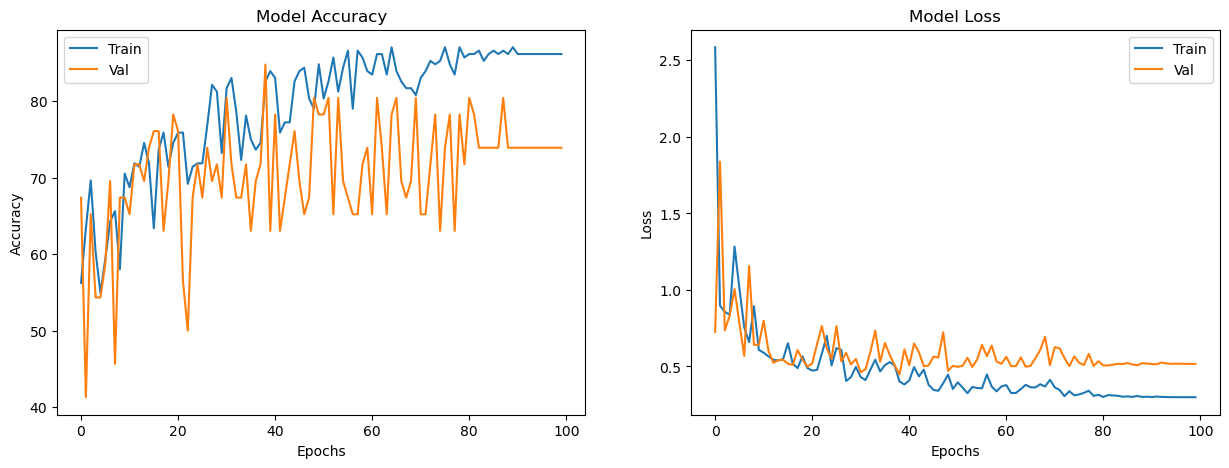

In [59]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plotting training and validation accuracy
ax[0].plot(train_accuracies)
ax[0].plot(val_accuracies)
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train', 'Val'])

# Plotting training and validation loss
ax[1].plot(train_losses)
ax[1].plot(val_losses)
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train', 'Val'])

plt.show()

### D. Evaluating Your Trained Model

In [60]:
# read test file
test_data = pd.read_csv('heart_dataset_test.csv')
test_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,50,0,2,120,219,0,1,158,0,1.6,1,0,2,1
1,58,0,2,120,340,0,1,172,0,0.0,2,0,2,1
2,66,0,3,150,226,0,1,114,0,2.6,0,0,2,1
3,43,1,0,150,247,0,1,171,0,1.5,2,0,2,1
4,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1


In [61]:
test_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [62]:
test_data = test_data.values
test_data.shape

(31, 14)

In [63]:
# Convert to PyTorch tensors
x_test = torch.from_numpy(test_data[:, :13]).float()
y_test = torch.from_numpy(test_data[:, 13]).long()

# Create datasets
test_dataset = TensorDataset(x_test, y_test)

# Create dataloaders
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [64]:
# Load the trained weights
model.load_state_dict(torch.load('model_classification.pth'))

# Set the model to evaluation mode
model.eval()

test_correct = 0
test_total = 0

with torch.no_grad():
    for features, labels in test_loader:

        features = features.cuda()
        labels = labels.cuda()

        outputs = model(features)

        predicted = outputs.argmax(-1)
        test_correct += (predicted == labels).sum().item()
        test_total += labels.size(0)

print(f'Test accuracy is {100. * test_correct / test_total}%')

Test accuracy is 83.87096774193549%


### plot for visualization

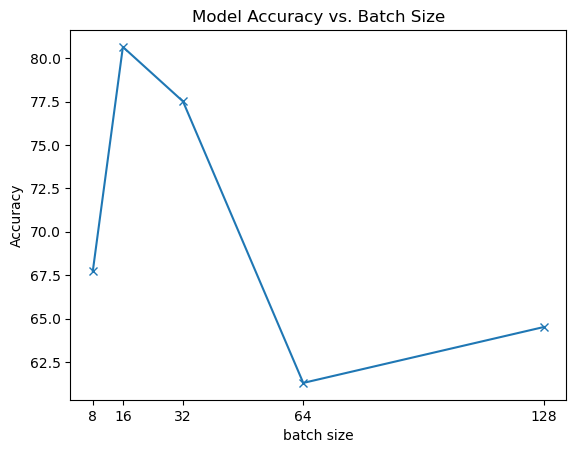

In [65]:
import matplotlib.pyplot as plt

batch_sizes = [8,16,32,64,128]
accuracy = [67.74, 80.65, 77.51, 61.29, 64.51]
plt.plot(batch_sizes, accuracy, marker='x', linestyle='-')
plt.title('Model Accuracy vs. Batch Size')
plt.xlabel('batch size')
plt.ylabel('Accuracy')
plt.xticks(batch_sizes)  # 設置 x 軸刻度為批量大小
plt.show()

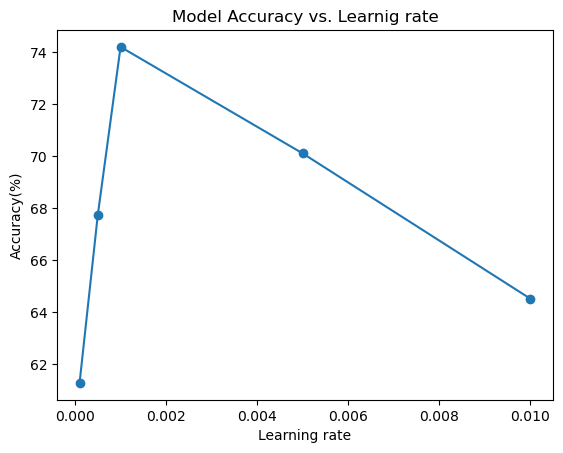

In [66]:
import matplotlib.pyplot as plt

lr = [1e-4, 5e-4, 1e-3, 5e-3, 1e-2]
accuracy = [61.29, 67.74, 74.19, 70.10, 64.52]
plt.plot(lr, accuracy, marker='o', linestyle='-')
plt.title('Model Accuracy vs. Learnig rate')
plt.xlabel('Learning rate')
plt.ylabel('Accuracy(%)')
#plt.xticks(lr)  # 設置 x 軸刻度為批量大小
plt.show()